# Assignment 2

Dhruval Bhatt

### Part 1: Final project research question related to the interpretation of a cultural pattern: 
    
What is the sentiment towards gig economy on digital platform, Twitter?

### Part 2: The digital data to be used: 
        
To study the public opinion on gig economy, I intend to use twitter data with #gigeconomy filter. After downloading the tweets with #gigeconomy, I will use the text of the data to gauge the sentiment of the conversation. I intend to use the current data as that is available for free. However, if there is no pattern indication in a smaller corpus of current tweets, I will consider using a Twitter service provider such as DiscoverText. They have a reasonably priced option for students and it might be helpful in expanding the data to get more meaningful information.


Additionally, to support or refute the idea that the scale and motive of gig economy is different from past years, I will be looking at survey data from Federal Reserve Boad from 2015 to 2018. These surveys are in csv format and have information about income, number of jobs and lifestyle. Not all years have the same questions so I will sift through the data to determine which questions align with each other such that they can be compared. 

### Part 3: Download Data

Using Twitter's standard API, data is from last week is filtered by #gigeconomy using tweepy in python. The code used to download the data can be found here: 

https://github.com/dhruvalb/culturepattern_gigeconomy/blob/master/Twitter%20Data%20Collection.ipynb

For this assignment, a subset of around 500 test tweets is gathered and stored in a pandas dataframe. The following steps show a sample of the data.

In [1]:
import pandas as pd
import folium
import geopy
from geopy.geocoders import Nominatim

In [2]:
#Load Data
data = pd.read_csv(r".\Assignment 2\test_df.csv")

In [3]:
data.head()

,user,location,tweet text
0,NeftalemF,Ethiopia,The question should be which African country i...
1,noikeanolife,"Kitano, Kobe City, Japan",RT @noikeanolife: How #dualcareer couples find...
2,HenleyAfrica,"Johannesburg, South Africa","#HenleyAfrica, following on @HenleyBSchool, di..."
3,AppOakam,"London, United Kingdom","https://t.co/muQc50Ksi1 - ""An interesting look..."
4,AfriSignature,"Nairobi, Kenya",RT @ImpactLabsEA: What is the gig economy?\r\n...


### Part 4: Demonstrate in Python that the cultural phenomenon you are studying is a legisign (i.e. a conventionalized sign relation), that produces a common interpretant.

The words, "gig economy" is a symbolic, indexical legisign that is used to point to an increasing trend of people working as a freelance professionals in consulting, writing, programming, designing etc.; picking up side hustles such as food delivery, ridesharing, renting out space; creating and selling goods and services independently. The nature of these jobs is viewed as temporary, flexible, on-need basis (both on the part of the employer and employee) and possibly part-time. While a gig refers to a temporary job, gig economy indicates the increasing trend of participation in such jobs that is impacting economy as a whole. The ease provided by online marketplaces of goods and services such as Uber, Etsy, AirBnB and freelance work platforms such as Upwork, Toptal or Freelancer might be a reason for this increase. While self-employment and project based, contract work are not a new trend, the demographics and scale of those participating is different. While consulting was a well paid opportunity for specialists, newer temporary jobs include lower-skilled workers that may be working to make ends meet. This gives rise to conversation about its impact and the positives and negatives of this trend. Questions of how is different, if it in fact is? Is it better for the workforce or not? How to handle the laws and regulations around fair work practices? While differing stance is taken on different issue, the term gig economy elicits a common understanding that it refers to a phenomenon of larger number of people taking up temporary jobs out of choice or need.

The graph below generated from Google Trends, shows how the search interest for the term, "gig economy" has increased dramatically. 

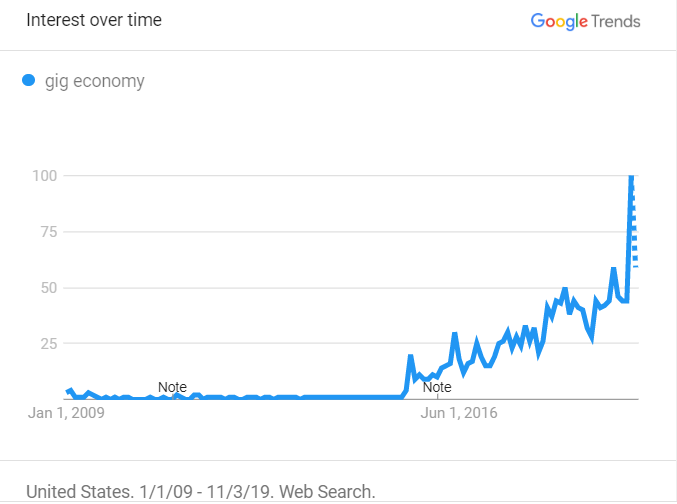

This graph helps us infer that inspite of the existence of freelance work, the trend of 'gig economy' is something new and has been on people's mind since the last 5 years. With the rise in the search interests, it shows that many people identify with this trend and recognize it as a phenomenon. Hence it is a legisign. 

Additionally, the graph below shows how the trend of search term gig economy compares to terms like freelance, gigs and side hustle

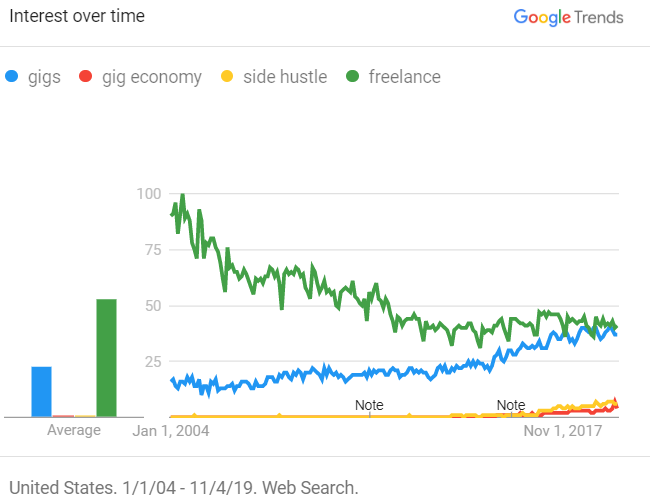

The search for freelance is going down but gigs and side hustle are increasing, right around the time that "gig economy" search has increased. This interesting trend lines might be an indication of how the nature of temporary jobs is changing. It is seems that temporary jobs today are driven by financial incentives to make extra money - a side hustle,  which is different from freelance positions that may be associated with specialized positions that need to work on project basis to provide expertise as needed. It could also be that an expansive term that includes freelance is now part of the digital and offline conversations.  

Another indication of gig economy being a legisign is the scale and spread of the location of users using #gigeconomy. Using the location coordinates derived from the location information of users, a map is created using Folium to see the reach of this conversation. As a trend that is being talked about, this term certainly holds some common meaning that allows people from all over the world to express their opinions using #gigeconomy. 

In [4]:
def process_location(location):
    '''
    Function to standardize the location
    '''
    clean_loc = str(location).strip().lower()
    return clean_loc

In [5]:
def define_coord(location):
    '''
    Function to get the coordinates, given a location
    Returns none if there is no identifiable location.
    '''
    locator = Nominatim(user_agent="myGeocoder")
    
    if location:
        a = locator.geocode(location, language='en')
        
        if a:
            return a.latitude, a.longitude
        else: 
            return 'None'
    else:
        return 'None'

In [6]:
#Process location string and create a new column for the the coordinates
data['location'] = data['location'].apply(process_location)
data['coordinates'] = data['location'].apply(define_coord)

In [8]:
data.head()

,user,location,tweet text,coordinates
0,NeftalemF,ethiopia,The question should be which African country i...,"(10.2116702, 38.6521203)"
1,noikeanolife,"kitano, kobe city, japan",RT @noikeanolife: How #dualcareer couples find...,"(34.6986623, 135.1940703)"
2,HenleyAfrica,"johannesburg, south africa","#HenleyAfrica, following on @HenleyBSchool, di...","(-26.205, 28.049722)"
3,AppOakam,"london, united kingdom","https://t.co/muQc50Ksi1 - ""An interesting look...","(51.5073219, -0.1276474)"
4,AfriSignature,"nairobi, kenya",RT @ImpactLabsEA: What is the gig economy?\r\n...,"(-1.2832533, 36.8172449)"


In [9]:
#(From Class Notes)

# Plot Folium map: see how we can navigate around it
m = folium.Map(zoom_start=2, location=[5.201749, 15.549500])

# Plot a point on top of it, indexing coordinates for restaurant with index '1':
for point in data['coordinates'].index:
    if data['coordinates'][point] is not 'None':
        folium.Marker(data['coordinates'][point]).add_to(m)

# Display map
m

### Part 5: (3 Points) What are your next steps beyond this basic identification of a cultural pattern? Do you need to gather any additional information? Do you need to perform any additional analyses in order to successfully answer your research question? How will these additional sources and/or analyses enable you to answer your research question? Provide a 200+ word response to these questions.

The next step is to dig deeper into the text of tweets with #gigeconomy. The first goal is to understand - what are people talking about? Laws around gig economy, the distruption it has brought or opportunites to participate in it? What is the percentage of each. This will be done by tracking which key words are used and then categorizing it into topics in gig economy. In addition, I will be using the twitter text to run a sentiment analysis to gauge if most public opinion is hopeful or fearful and does this vary within the topics identified? Finally, a big part of the conversation around gig economy is that the scale and demographics of today's temporary workforce is different from what was the norm in the past and hence an additional consideration of how to handle it is necessary. This is the reason regulations around companies like Uber is a hot topic. I will be using federal reserve survey data (https://www.federalreserve.gov/consumerscommunities/shed_data.htm) to see how the income level and motivation for part time workers have changed from 2013 to 2018. This will help me understand the demographics of 'gig economy' workers over time. The survey analysis and text analysis will help confirm the interpretant of #gigeconomy.